In [1]:
import numpy as np
import matplotlib.pyplot as plt

## a - Vertical profiles of mean velocities and turbulence intensities

Text(0.5, 1.0, 'I')

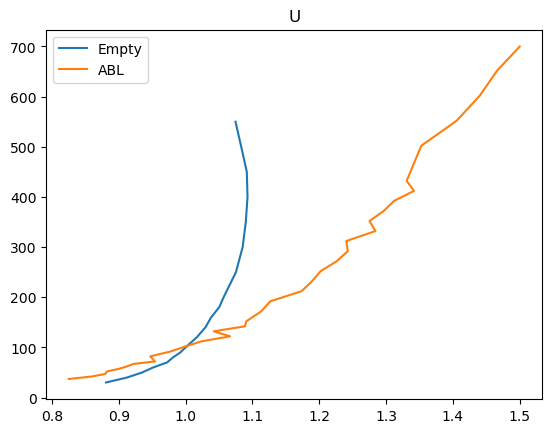

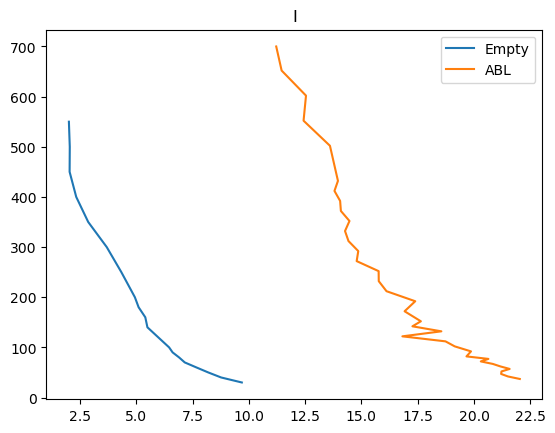

In [2]:
empty_data = np.loadtxt("empty_profile_data.txt",skiprows=1)
abl_data = np.loadtxt("abl_profile_data.txt",skiprows=1)

empty_z = empty_data[:,0]
empty_u = empty_data[:,1]
empty_I = empty_data[:,2]
empty_u_ndim = empty_data[:,3]

abl_z = abl_data[:,0]
abl_u = abl_data[:,1]
abl_I = abl_data[:,2]
abl_u_ndim = abl_data[:,3]

fig_u, ax_u = plt.subplots()
ax_u.plot(empty_u_ndim, empty_z, label="Empty")
ax_u.plot(abl_u_ndim, abl_z, label="ABL")
ax_u.legend()
ax_u.set_title("U")

fig_I, ax_I = plt.subplots()
ax_I.plot(empty_I, empty_z, label="Empty")
ax_I.plot(abl_I, abl_z, label="ABL")
ax_I.legend()
ax_I.set_title("I")

## b - $z_0$ and $u^*$

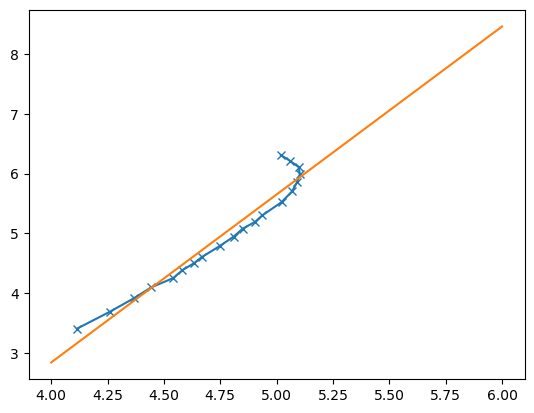

In [3]:
ln_empty_z = np.log(empty_z)
ln_abl_z = np.log(abl_z)

empty_k_ustar, ln_empty_z0 = np.polyfit(empty_u, ln_empty_z, 1)
abl_k_ustar, ln_abl_z0 = np.polyfit(abl_u, ln_abl_z, 1)

empty_z0 = np.exp(ln_empty_z0)
abl_z0 = np.exp(ln_abl_z0)

k = 0.41
empty_ustar = k*empty_u
abl_ustar = k*abl_u

plot_u = np.linspace(4,6,101)
plot_ln_empty_z = ln_empty_z0 + empty_k_ustar*plot_u

fig1, ax1 = plt.subplots()
ax1.plot(empty_u, ln_empty_z, marker="x")
ax1.plot(plot_u, plot_ln_empty_z)




## b - 

In [4]:
np.arange(0,1.5).astype(int)

array([0, 1])

In [5]:
data_w3 = np.loadtxt("ABL_FULL.W0003")
data_w17 = np.loadtxt("ABL_FULL.W0017")
data_w28 = np.loadtxt("ABL_FULL.W0028")
    

In [6]:
def auto_corr(data):
    
    mean_data = np.mean(data)
    fluct_data = data - mean_data
    
    avg_squared_fluc = np.mean(fluct_data**2)
    
    shift = np.arange(1, 0.03*len(fluct_data)).astype(int)
    r = np.zeros(len(shift))
    
    for i, shift in enumerate(shift):
        r[i] = np.mean(fluct_data[:-shift]*fluct_data[shift:])/avg_squared_fluc
        
    return r, mean_data

r_w3, mean_w3 = auto_corr(data_w3[:,1])
r_w17, mean_w_17 = auto_corr(data_w17[:,1])
r_w28, mean_w_28 = auto_corr(data_w28[:,1])


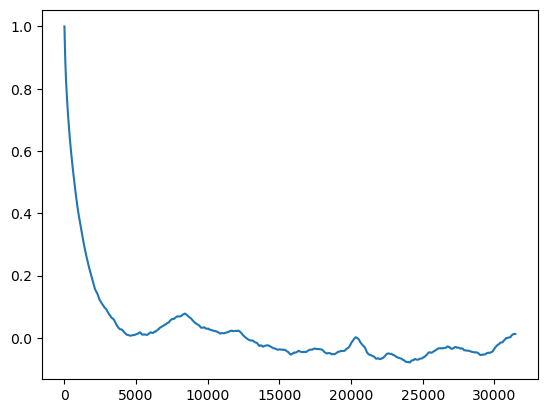

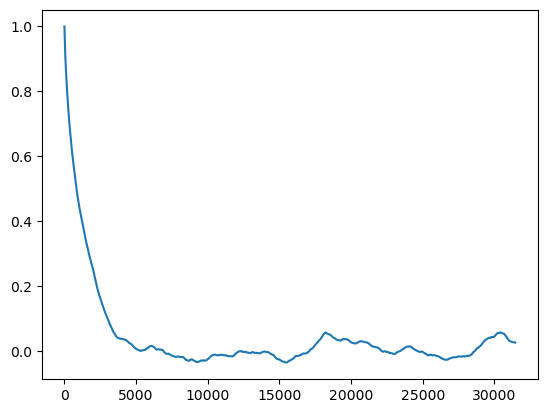

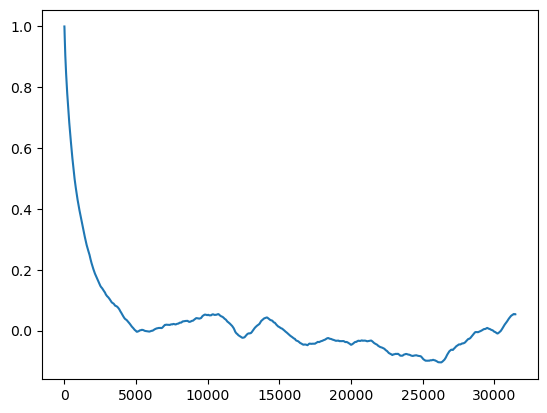

In [7]:
fig_w3, ax_w3 = plt.subplots()
ax_w3.plot(r_w3)

fig_w17, ax_w17 = plt.subplots()
ax_w17.plot(r_w17)

fig_w28, ax_w28 = plt.subplots()
ax_w28.plot(r_w28)

dt = 1/10000

r_w3_end = np.argwhere(r_w3 < 0)[0][0]
r_w17_end = np.argwhere(r_w17 < 0)[0][0]
r_w28_end = np.argwhere(r_w28 < 0)[0][0]

time_scale_w3 = np.trapz(r_w3[:r_w3_end+1])*dt
time_scale_w17 = np.trapz(r_w17[:r_w17_end+1])*dt
time_scale_w28 = np.trapz(r_w28[:r_w28_end+1])*dt

length_scale_w3 = time_scale_w3 * mean_w3
length_scale_w17 = time_scale_w17 * mean_w_17
length_scale_w28 = time_scale_w28 * mean_w_28

